(150, 4)
(150, 2)


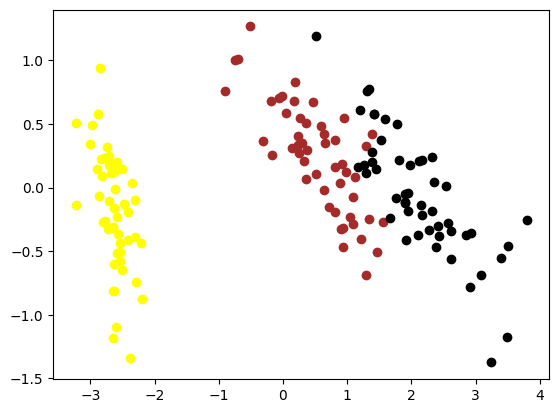

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
mean=np.mean(x, axis=0)
norm=x-mean
cova=np.cov(norm, rowvar=False)
eval,evec=np.linalg.eig(cova)
sorto=np.argsort(eval)[::-1]
sort_val=eval[sorto]
sort_vec=evec[:,sorto]
projmat=sort_vec[:,:2]
td=np.dot(norm, projmat)
print(x.shape)
print(td.shape)
color=["yellow","brown","black"]
for i, tn in enumerate(iris.target_names):
    plt.scatter(td[iris.target==i,0],td[iris.target==i,1],color=color[i])
plt.show()

above code is for pca

In [76]:
#this code is for knn
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\ayush\Downloads\iris (1).csv",header=None)
cols=["a","b","c","d","tgt"]
df=df.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
df.columns=cols
df.head()
class knnc:
    def __init__(self, k):
        self.k = k
        self.x_train = None
        self.y_train = None

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = []
        for x in x_test:
            predictions.append(self._predict(x))
        return np.array(predictions)
    
    def _predict(self, x):
        distance = np.sqrt(np.sum((self.x_train - x)**2, axis=1))
        indices = np.argsort(distance)[:self.k]
        nlabels = self.y_train[indices]
        return mode(nlabels)
from sklearn.model_selection import train_test_split
x=np.array(df.drop("tgt", axis=1))
y=np.array(df["tgt"])
x_train, x_test, y_train, y_test=train_test_split(x,y)
knn = knnc(k=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



In [16]:
df2=pd.read_csv(r"C:\Users\ayush\Downloads\winequality-red.csv")
df2.head()
df2.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
X=df2.drop('quality',axis=1).values
y = df2["quality"].values
X_normalized1 = (X - np.mean(X)) / np.std(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized1, y,test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
y_pred2=np.round(y_pred2).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.73      0.28      0.41       130
           6       0.46      0.92      0.61       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.50       320
   macro avg       0.20      0.20      0.17       320
weighted avg       0.48      0.50      0.42       320



C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [50]:
class LogisticRegression:
    def __init__(self, lr=0.01, iter=100):
        self.iter=iter
        self.lr=lr
        self.wet=None
        self.bias=None
    def sigmoid(self, z):
        return 1/(1+ np.exp(-z))
    def fit(self,x,y):
        self.wet=np.zeros(x.shape[1])
        self.bias=0
        for _ in range(self.iter):
            logits=np.dot(x,self.wet)+self.bias
            y_pred=self.sigmoid(logits)
            dw=(1/len(x))*np.dot(x.T,(y_pred-y))
            db=(1/len(x))*np.sum(y_pred-y)
            self.wet -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, x,thr=0.5):
        logi=np.dot(self.wet, x)+ self.bias
        sol=self.sigmoid(logi)
        return (sol>=thr).astype(int)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred3 = model.predict(X_test)
y_pred3=np.round(y_pred3).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.73      0.28      0.41       130
           6       0.46      0.92      0.61       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.50       320
   macro avg       0.20      0.20      0.17       320
weighted avg       0.48      0.50      0.42       320



C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
#lda code

In [72]:

class LDA:
    def __init__(self,ncomps):
        self.ncomps=ncomps
        self.lds= None
    def fit(self,x,y):
        classes= np.unique(y)
        mean=np.mean(x,axis=0)
        numfeats= x.shape[1]
        sw=np.zeros((numfeats,numfeats))
        sb= np.zeros((numfeats,numfeats))
        for c in classes:
            xc=  x[c==y]
            meanc= np.mean(xc,axis=0)
            meandiff= (meanc-mean).reshape(-1,1)
            diff=xc-meanc
            sw+= diff.T @ diff
            sb+= numfeats* meandiff @ meandiff.T
        eivals,eivecs= np.linalg.eig(np.linalg.inv(sw)@sb)
        indices= np.argsort(eivals)[::-1]
        self.lds=[]
        for i in range(self.ncomps):
            self.lds.append(eivecs[indices[i]]@x.T)
        return self.lds
    

In [75]:
lda= LDA(ncomps=3)
lda.fit(x,y)

[array([1.08875182-0.52150736j, 1.05226104-0.52150736j,
        1.00478573-0.47804841j, 0.99458677-0.5649663j ,
        1.06736261-0.52150736j, 1.17011626-0.5649663j ,
        0.99189207-0.47804841j, 1.07385597-0.5649663j ,
        0.95070439-0.52150736j, 1.05136281-0.60842525j,
        1.15312517-0.5649663j , 1.03757091-0.60842525j,
        1.02707317-0.5649663j , 0.91052762-0.43458946j,
        1.2183037 -0.43458946j, 1.21770424-0.47804841j,
        1.1513287 -0.39113052j, 1.09344871-0.47804841j,
        1.22779054-0.60842525j, 1.0954509 -0.52150736j,
        1.16521365-0.6518842j , 1.10104602-0.47804841j,
        0.96661115-0.34767157j, 1.11872963-0.52150736j,
        1.05166158-0.73880209j, 1.0821458 -0.60842525j,
        1.08794664-0.52150736j, 1.11393969-0.5649663j ,
        1.11014103-0.52150736j, 1.0188764 -0.60842525j,
        1.04026561-0.60842525j, 1.16521365-0.47804841j,
        1.10385339-0.60842525j, 1.16442809-0.52150736j,
        1.05136281-0.60842525j, 1.06156177-0.434

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_csv()
df=df.replace({"positive":1,"negative":0})
df.head()
stpwds=list(stopwords.words("english"))
yay=TfidfVectorizer(stop_words=stpwds)
x=yay.fit_transform(df["review"])
y=df["sentiment"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
naivebayes=MultinomialNB()
naivebayes.fit(x_train,y_train)
y_pred=naivebayes.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data directories
train_dir = r"C:\Users\ayush\Downloads\Dog and Cat .png"
batch_size = 32
image_size = (224, 224)

# Data Preprocessing and Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training')  # Use 80% of data for training

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')  # Use 20% of data for validation

# Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,
                    epochs=10, validation_data=validation_generator,  
                    validation_steps=validation_generator.samples//batch_size)
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

KeyboardInterrupt: 

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", test_accuracy)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 18s 1s/step - loss: 1.2140 - accuracy: 0.4914 - val_loss: 0.6916 - val_accuracy: 0.5234
Epoch 2/10
17/17 [==============================] - 13s 765ms/step - loss: 0.6949 - accuracy: 0.5048 - val_loss: 0.6926 - val_accuracy: 0.5234
Epoch 3/10
17/17 [==============================] - 14s 797ms/step - loss: 0.6930 - accuracy: 0.5219 - val_loss: 0.6891 - val_accuracy: 0.5156
Epoch 4/10
17/17 [==============================] - 14s 811ms/step - loss: 0.6804 - accuracy: 0.5581 - val_loss: 0.6843 - val_accuracy: 0.5859
Epoch 5/10
17/17 [==============================] - 14s 807ms/step - loss: 0.6406 - accuracy: 0.6471 - val_loss: 0.6567 - val_accuracy: 0.5703
Epoch 6/10
17/17 [==============================] - 14s 803ms/step - loss: 0.5573 - accuracy: 0.6838 - val_loss: 0.6956 - val_accuracy: 0.6016
Epoch 7/10
17/17 [==============================] - 14s 836ms/s

In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 490s 3us/step
Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5094 - accuracy: 0.4492 - val_loss: 1.2301 - val_accuracy: 0.5590
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1329 - accuracy: 0.5984 - val_loss: 1.0872 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9820 - accuracy: 0.6559 - val_loss: 0.9998 - val_accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8849 - accuracy: 0.6905 - val_loss: 0.9764 - val_accuracy: 0.6621
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8101 - accuracy: 0.7160 - val_loss: 0.9

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)


Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1441 - accuracy: 0.9559 - val_loss: 0.0515 - val_accuracy: 0.9847
Epoch 2/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0283 - val_accuracy: 0.9908
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0307 - val_accuracy: 0.9912
Epoch 6/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0298 - val_accuracy: 0.9917
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0314 -

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define dense model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", test_accuracy)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 8s 419ms/step - loss: 40.3147 - accuracy: 0.4724 - val_loss: 5.4225 - val_accuracy: 0.5156
Epoch 2/10
17/17 [==============================] - 7s 401ms/step - loss: 12.9052 - accuracy: 0.5105 - val_loss: 9.8857 - val_accuracy: 0.5312
Epoch 3/10
17/17 [==============================] - 7s 424ms/step - loss: 4.2557 - accuracy: 0.6019 - val_loss: 3.7702 - val_accuracy: 0.5234
Epoch 4/10
17/17 [==============================] - 7s 396ms/step - loss: 2.1375 - accuracy: 0.6305 - val_loss: 4.6240 - val_accuracy: 0.5156
Epoch 5/10
17/17 [==============================] - 7s 390ms/step - loss: 2.1156 - accuracy: 0.6514 - val_loss: 1.8811 - val_accuracy: 0.5781
Epoch 6/10
17/17 [==============================] - 7s 390ms/step - loss: 5.4963 - accuracy: 0.5981 - val_loss: 21.2245 - val_accuracy: 0.5078
Epoch 7/10
17/17 [==============================] - 6s 379ms/st

In [85]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/50


C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 16ms/step - loss: 1.2128 - accuracy: 0.7188 - val_loss: 1.2252 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.7188 - val_loss: 0.8045 - val_accuracy: 0.4167
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.6146 - val_loss: 0.7048 - val_accuracy: 0.5833
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6979 - val_loss: 0.6620 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7083 - val_loss: 0.6259 - val_accuracy: 0.5417
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5159 - accuracy: 0.7708 - val_loss: 0.5610 - val_accuracy: 0.8333
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7708 - val_loss: 0.5600 - val_accuracy: 0.6250
Epoch 8/50
12/12 [============

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\ayush\Downloads\a\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define ANN model architecture with kernel regularizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(150, 150, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", test_accuracy)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/5
18/18 [==============================] - 26s 1s/step - loss: 24.4696 - accuracy: 0.4937 - val_loss: 4.6917 - val_accuracy: 0.5714
Epoch 2/5
18/18 [==============================] - 25s 1s/step - loss: 8.2541 - accuracy: 0.5673 - val_loss: 4.3391 - val_accuracy: 0.5429
Epoch 3/5
18/18 [==============================] - 25s 1s/step - loss: 2.2339 - accuracy: 0.6391 - val_loss: 1.3946 - val_accuracy: 0.5857
Epoch 4/5
18/18 [==============================] - 25s 1s/step - loss: 0.7788 - accuracy: 0.7307 - val_loss: 1.0448 - val_accuracy: 0.6143
Epoch 5/5
5/5 [==============================] - 2s 415ms/step - loss: 1.0130 - accuracy: 0.6143
Test Accuracy: 0.6142857074737549


In [98]:
y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int)
y_true = validation_generator.classes
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

5/5 [==============================] - 2s 405ms/step
              precision    recall  f1-score   support

           0       0.64      0.49      0.56        92
           1       0.33      0.48      0.39        48

    accuracy                           0.49       140
   macro avg       0.49      0.48      0.47       140
weighted avg       0.54      0.49      0.50       140



In [93]:
def viterbiu(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
        path[st] = [st]
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}
        for st in states:
            max_prob, prev_st = max((V[t-1][prev_st]["prob"] * trans_p[prev_st][st], prev_st) for prev_st in states)
            V[t][st] = {"prob": max_prob * emit_p[st][obs[t]], "prev": prev_st}
            new_path[st] = path[prev_st] + [st]
        path = new_path
    max_prob, best_st = max((V[len(obs) - 1][st]["prob"], st) for st in states) 
    best_path = path[best_st]
    return best_path

observations = ["1", "3", "1"]
states = ["hot", "cold"]
start_p = {"hot": 0.8, "cold": 0.2}
trans_p = {
    "hot": {"hot": 0.7, "cold": 0.3},
    "cold": {"hot": 0.4, "cold": 0.6},
}
emit_p = {
    "hot": {"1": 0.2, "2": 0.4, "3": 0.4},
    "cold": {"1": 0.5, "2": 0.4, "3": 0.1},
}
result = viterbiu(observations, states, start_p, trans_p, emit_p)
print("Most likely hidden state sequence:", result)


Most likely hidden state sequence: ['hot', 'hot', 'cold']
